In [2]:
import sys
import numpy as np
import pylab as pl
from scipy.stats import linregress
from scipy import stats  as S
%matplotlib inline

sys.path.append("/Users/maithoma/work/github/bsr/analysis/")
sys.path.append("/Users/maithoma/work/github/bsr/experiment/")
sys.path.append("/Users/maithoma/work/github/brainlib/")

#sys.path.append("/Users/maithoma/work/python/")
#from tm_python_lib import *

import Levenshtein
from scipy import stats as S

try:
    reload(bsrAnalysisLib)
    #reload(tasks)
except:
    import bsrAnalysisLib
    #import tasks
    
from bsrAnalysisLib import *
#from tasks import *

rootDir = "/Users/maithoma/work/github/bsr/analysis/"

In [2]:
from tasks import *
articles = ['bigPolluter',
         'emojiShortened',
         'indianFood',
         'marsOneShortened',
         'Ohmconnect',
         'pressFreedomUS']
aDic = getArticlesFromS3()

In [ ]:
tokens = ['8db55','68cdc','92647','ac3ef','f62ff','29979','d6dbd','2cd39','85d6e',
          '5f615','94460','b527b','9a02b','74712','46dfb','ad3fb','474f1',
          'b9817','35d1b','251a6','5534e']

allData = {}

for token in tokens:
    J,Jlist = retrieveExperiment(token)
    allData[token] = {'J':J,'Jlist' : Jlist}


In [60]:
allData['d6dbd']['J']['06_RSVP_bsrMinus']['responses']['r4']['response']

u'7'

In [45]:
rate = 1./np.array(allData['474f1']['J']['08_RSVP_bsrPlus']['exp']['rate'])
iMin = np.argmin(rate)
iMax = np.argmax(rate)
stability = (max(rate) - min(rate))*np.abs(iMax - iMin)/len(rate)
print stability

0.898138250517


In [5]:
allData = json.loads(open(rootDir + "allData.json", "rb").read())
tokens = ['8db55','68cdc','92647','ac3ef','f62ff','29979','d6dbd','2cd39','85d6e',
          '5f615','94460','b527b','9a02b','74712','46dfb','ad3fb','474f1',
          'b9817','35d1b','251a6','5534e']

In [1]:
tokens = ['8db55','68cdc','92647','ac3ef','f62ff','29979','d6dbd','2cd39','85d6e',
          '5f615','94460','b527b','9a02b','74712','46dfb','ad3fb','474f1',
          'b9817','35d1b','251a6','5534e']

In [2]:
len(tokens)

21

In [7]:
age = []
for token in tokens:
    
    try:
        response = allData[token]['J']['finalQ']['2']['response']
        #print type(response),response
        
        if isinstance(response,unicode):
            age = np.append(age,int(response))
        elif isinstance(response,dict):
            age = np.append(age,int(response['choices']))
    except:
        print token, " not found"
        continue
        
females = len(age[age==1]) + 1        
males = len(age[age==2]) + 2

8db55  not found
68cdc  not found
94460  not found


### Demographics

In [282]:
outdemographics = open(rootDir + "data_export_demographics.csv", "wb")
outdemographics.write("participantId,PreferedTreatmentRank,Sex,Age,EnglishLevel,HighestDegreAchieved,RightLeftHanded,AttentionDisorder,Drugs,SpeedReading\n")

dicDemographics = {}

for i,token in enumerate(tokens[:]):
    J = allData[token]['J']
    Jlist = allData[token]['Jlist']
    for treatment in ['5','6','7','8','9','10','11']:

        if not Jlist.has_key(treatment):
            continue
        
        if Jlist[treatment] in ['%02d_finalQ'%int(treatment),'finalQ']:
            
            #if len(J[Jlist[treatment]].keys())!=11:
            #    continue    
            #else:
            try:
                finalQdic = extractFinalQuestions(J[Jlist[treatment]])
                dicDemographics[token] = finalQdic
            except:
                print token,J[Jlist[treatment]].keys()
                continue
            #print finalQdic

            outdemographics.write(token + ",")
            for q in np.sort(finalQdic.keys()):
                outdemographics.write(str(finalQdic[q]) + ",")
            outdemographics.write("\n")
            
outdemographics.close()

68cdc [u'3', u'2', u'4', u'eegData']
92647 [u'3', u'2', u'4', u'eegData']
ac3ef [u'3', u'2', u'4', u'eegData']
f62ff [u'3', u'2', u'4', u'eegData']
29979 [u'3', u'2', u'4', u'eegData']
d6dbd [u'3', u'2', u'4', u'eegData']
2cd39 [u'3', u'2', u'4', u'eegData']
85d6e [u'3', u'2', u'4', u'eegData']
5f615 [u'3', u'2', u'4', u'eegData']


In [300]:
dicDemographics['74712'][1]

array([6, 8, 7, 5])

In [25]:
outfile = open(rootDir + "data_export.csv", "wb")
outfile.write("ParticipantId,TreatmentNumber,TreatmentType,TextLength,TextSample,TimeReadNormal,MeanRate,VarianceRate,Stability\n")
            
        
for i,token in enumerate(tokens[:]):
    J = allData[token]['J']
    Jlist = allData[token]['Jlist']


    normal_read = J[Jlist['4']][u'eegData']['t'][-1]
    #header = "%s,%.3f"%(token,normal_read)

    for treatment in ['5','6','7','8','9','10','11']:

        
        if not Jlist.has_key(treatment):
            continue

        if Jlist[treatment] == 'config':
            continue
            
        if Jlist[treatment] in ['%02d_finalQ'%int(treatment),'finalQ']:
            continue

            #rate:
        rate = 1./np.array(J[Jlist[treatment]]['exp']['rate'])
        words = J[Jlist[treatment]]['exp']['words']
        wordsStart = " ".join(words[1:3])
        
        iMin = np.argmin(rate)
        iMax = np.argmax(rate)
        stability = (max(rate) - min(rate))*np.abs(iMax - iMin)/len(rate)
        
        if (min(rate) < 1/0.174 or max(rate) > 1./0.031):
            stability = 5
        
        outfile.write("%s,"%token)        
        outfile.write("%s,%s,%s,%s,%s,%s,%s,%s,"%(treatment,Jlist[treatment][8:],len(words),wordsStart,normal_read,np.mean(rate),np.var(rate),stability))
        
        for q in range(1,11):
            try:
                outfile.write("%s,"%dicDemographics[token][q])
            except:
                outfile.write(",")
        outfile.write("\n")                
        
outfile.close()

In [247]:
def extractFinalQuestions(dicFinalQ):
    
    outdic = {}

    for q in range(1,11):

        r = dicFinalQ[str(q)]['response']

        if q == 1: # text rank  
            order = np.array(map(int,r['choices'])) - 1
            treatments = np.arange(5,5+len(order))
            answer = treatmentRank = treatments[order]

        elif q == 3: # age
            answer = r

        else:
            answer = r['input'][int(r['choices'])-1]


        outdic[q] = answer

    return outdic

In [261]:
J['finalQ']['10']

{u'question': {u'choices': [u'Yes', u'No', u"I don't remember"],
  u'question': u'Have you ever practiced any speed-reading or mental calculation techniques?',
  u'type': u'unique_choice'},
 u'response': {u'choices': u'2',
  u'input': [u'Yes', u'No', u"I don't remember"]},
 u't0': 1448069522.276165,
 u't1': 1448069529.202968}

7


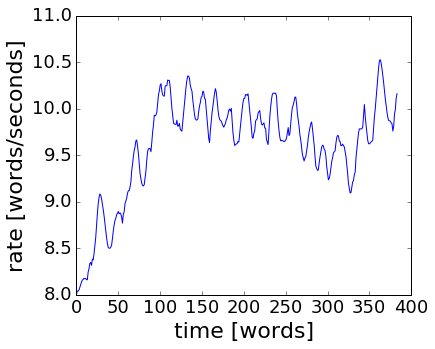

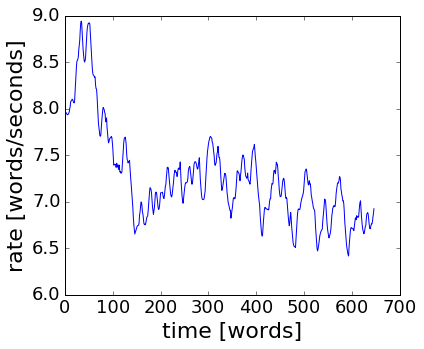

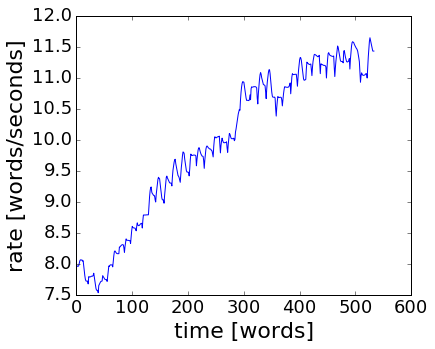

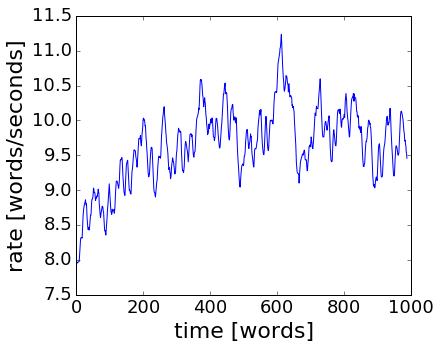

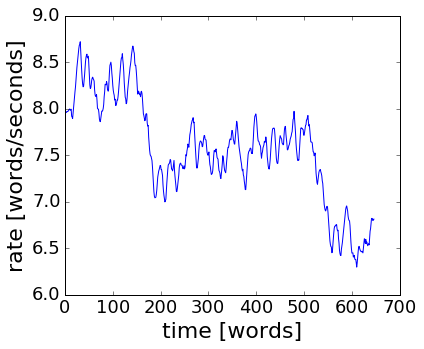

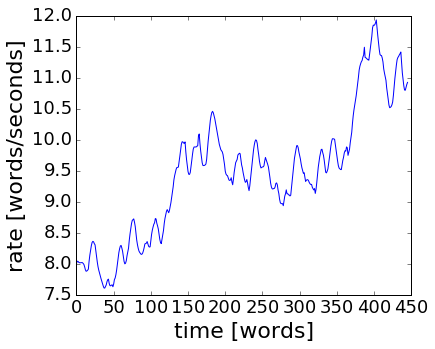

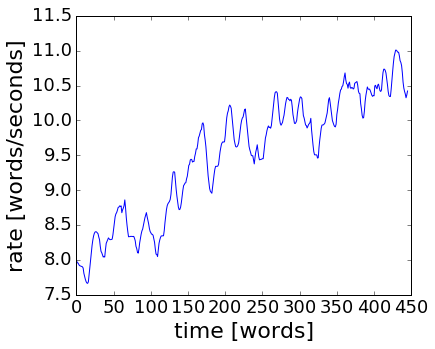

In [133]:
threshold = 2
burn = 100
k=0

Subject = []
Treatment = []
Metric = []
meandRate = []
mDiffRate = []

outfile = open(rootDir + "stability2.csv", "wb")


for i,token in enumerate(tokens[:]):
    J = allData[token]['J']
    Jlist = allData[token]['Jlist']
    
    #for treatment in [5,6,7,8]:
    for treatment in ['4','5','6','7','8','9','10']:

        if not Jlist.has_key(treatment):
            continue
        
        
        if not Jlist[treatment][3:] in ["RSVP_bsrPlus","RSVP_bsrMinus"]:
            outfile.write("%s,%s\n"%(token,Jlist[treatment]))
            continue
        
        
        rate = 1./np.array(J[Jlist[treatment]]['exp']['rate'])
        dRate = np.diff(rate)
        
        if (min(rate) < 1/0.174 or max(rate) > 1./0.031):
            outfile.write('%s,%s,"rate boundaries reached"\n'%(token,Jlist[treatment]))
            continue
        
        #print token,Jlist[treatment][3:],len(dRate)
        #print " all words : mean : %.4f, std: %.4f"%(np.mean(dRate),np.std(dRate))
        #print " words (> 50): mean : %.4f, std: %.4f"%(np.mean(dRate[burn:]),np.std(dRate[burn:]))
        
        mDiffRate = np.append(meandRate,np.mean(dRate))

        iMin = np.argmin(rate)
        iMax = np.argmax(rate)
        m0 = max(rate) - min(rate)
        m1 = (max(rate) - min(rate))/len(rate)
        m2 = (rate[-1] - rate[0])/len(rate)
        m3 = (max(rate) - min(rate))*np.abs(iMax - iMin)/len(rate)
        
        metric = m3
        
        Subject = np.append(Subject,token)
        Treatment = np.append(Treatment,Jlist[treatment][3:])
        Metric = np.append(Metric,metric)

        outfile.write('%s,%s,%s,%s,%s\n'%(token,Jlist[treatment],metric,np.mean(rate),np.var(rate)))
        
        #if np.abs(np.mean(dRate)) < 0.003:
        if metric > threshold:
            
            k += 1
        
            #print max(rate) - min(rate), (max(rate) - min(rate))/rate[0],(max(rate) - min(rate))/(rate[-1] - rate[0])
            #print m0,m1,m2,m3
            #x = range(0,len(rate))
            #fit = S.linregress(x,rate)
            #print "slope = %.3f, st-err = %.4f, p = %.3f"%(fit[0],fit[-1],fit[3])
             
            pl.figure(k,(6,5))
            pl.plot(rate)
            pl.xlabel("time [words]")
            pl.ylabel("rate [words/seconds]")
            #pl.text(10,rate[0],"%.2f %.2f"%(min(rate),max(rate)))
            #pl.text(10,rate[0]," all words : mean : %.4f, std: %.4f"%(np.mean(dRate),np.std(dRate)))
            #pl.text(burn,rate[0]-0.5," words (> 50): mean : %.4f, std: %.4f"%(np.mean(dRate[burn:]),np.std(dRate[burn:])))
            #pl.text(100,rate[0],"subject: %s, %.5f" %(token,metric))
print k
outfile.close()

In [269]:
cBSRplus = (Treatment == "RSVP_bsrPlus")*(Metric < threshold)
cBSRminus = (Treatment == "RSVP_bsrMinus")*(Metric < threshold)


print len(Metric[cBSRplus])
print len(Metric[cBSRminus])
both = 0
nboth = 0
for token in tokens:
    c = Subject == token
    for treatment in ["RSVP_bsrPlus","RSVP_bsrMinus"]:
        t = Treatment == treatment
        
    print token,Treatment[c],len(Subject[c]),len(Metric[c*cBSRplus]),len(Metric[c*cBSRminus])
    
    if (len(Subject[c]) == len(Metric[c*cBSRplus]) + len(Metric[c*cBSRminus])):
        both += 1 
    else:
        nboth += 1
print both,nboth

13
12
8db55 [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 1
68cdc [u'RSVP_bsrMinus' u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 3 1 2
92647 [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 0
ac3ef [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 0 0
f62ff [u'RSVP_bsrMinus' u'RSVP_bsrMinus'] 2 0 2
2cd39 [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 0
94460 [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 0
b527b [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 1
9a02b [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 0
74712 [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 0
46dfb [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 0 1
ad3fb [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 1
474f1 [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 1
b9817 [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 1
35d1b [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 0 1
251a6 [u'RSVP_bsrMinus' u'RSVP_bsrPlus'] 2 1 0
5534e [u'RSVP_bsrPlus' u'RSVP_bsrMinus'] 2 1 1
8 9


45.79889988899231

In [32]:
J[Jlist['3']]['operations']['4']['op']

[14, u'x', 10]

In [119]:
print "stable: ", len(np.argwhere(np.abs(mDiffRate) < 0.001)==True)
print "unstable: ", len(np.argwhere(np.abs(mDiffRate) > 0.001)==True)

stable:  10
unstable:  30
